In [4]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Cifar\Cifar-10\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


The cifar-10 dataset according to documentation it has 10 classes with 6000 images per class.<br>
I will choose 5 of the total classes which are airplane, automobile, bird, cat, deer.

In [48]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Cifar\Cifar-10\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


32 (height) X 32 (width) X 3 (colours RGB) = 3072 numbers. <br> So every picture is a vector of 3072 elements.

In [49]:
print(f'The training shape is : {X_train.shape}')
print(f'The testing shape is : {X_test.shape}')

The training shape is : (50000, 32, 32, 3)
The testing shape is : (10000, 32, 32, 3)


In [50]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

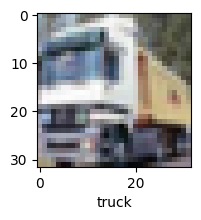

In [40]:
def plot_sample(X, y, index, classes):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()
    
y_train = y_train.flatten()
plot_sample(X_train, y_train, 1, classes)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. <br>Hence to normalize in 0-->1 range, we need to divide it by 255

In [51]:
# Flatten και normalize
X_train_flat = X_train.reshape(len(X_train), -1) / 255.0
X_test_flat  = X_test.reshape(len(X_test), -1) / 255.0

# y_train και y_test πρέπει να είναι 1D
y_train = y_train.flatten()
y_test  = y_test.flatten()


In [53]:
X_train_flat.shape

(50000, 3072)

In [54]:
X_test_flat.shape

(10000, 3072)

In [56]:
y_train.shape

(50000,)

In [59]:
X = X_train_flat + X_test_flat

ValueError: operands could not be broadcast together with shapes (50000,3072) (10000,3072) 

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train_flat, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("CV Accuracy Mean:", scores.mean())
print("CV Accuracy Std:", scores.std())

CV Accuracy Mean: nan
CV Accuracy Std: nan


d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Cifar\Cifar-10\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Cifar\Cifar-10\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Big_Data_&_Analytics\Machine Learning and Algorithms\Τελελης\Cifar\Cifar-10\venv\Lib\site-packages\sklearn\base.py", line 1336, in wra